In [1]:
]activate .

 Activating environment at `~/Documents/Julia/FMSynth.jl/example/Project.toml`


In [2]:
using Revise
using FMSynth, SampledSignals
using Unitful

┌ Info: Precompiling FMSynth [fbc5c0f3-52a8-4882-83c0-0d2ababde38b]
└ @ Base loading.jl:1260


In [3]:
o1 = Oscillator(sine_wave, 300.)
o2 = Oscillator(triangle_wave, 300.)
fm = FrequencyModulator(o1,o2,.9)
src = SynthesizerSource(fm)

SynthesizerSource{FrequencyModulator{Float64,Oscillator{Float64,typeof(sine_wave),Float64,Float64},Oscillator{Float64,typeof(triangle_wave),Float64,Float64},Float64,Tuple{Pair{Oscillator{Float64,typeof(triangle_wave),Float64,Float64},FMSynth.var"#1#2"{Float64}}}}}(FrequencyModulator{Float64,Oscillator{Float64,typeof(sine_wave),Float64,Float64},Oscillator{Float64,typeof(triangle_wave),Float64,Float64},Float64,Tuple{Pair{Oscillator{Float64,typeof(triangle_wave),Float64,Float64},FMSynth.var"#1#2"{Float64}}}}(Oscillator{Float64,typeof(sine_wave),Float64,Float64}(FMSynth.sine_wave, 300.0, 0.0), Oscillator{Float64,typeof(triangle_wave),Float64,Float64}(FMSynth.triangle_wave, 300.0, 0.0), Base.RefValue{Float64}(300.0), (Oscillator{Float64,typeof(triangle_wave),Float64,Float64}(FMSynth.triangle_wave, 300.0, 0.0) => FMSynth.var"#1#2"{Float64}(0.9),)))

In [4]:
o1 = Oscillator(sine_wave, 300.)
o2 = Oscillator(triangle_wave, 600.)
src = SynthesizerSource(.5o1 + .5o2)
pitch = PitchController(300, o1=>1, o2=>1.9)

PitchController{Float64,Tuple{Pair{Oscillator{Float64,typeof(sine_wave),Float64,Float64},Base.Fix1{typeof(*),Int64}},Pair{Oscillator{Float64,typeof(triangle_wave),Float64,Float64},Base.Fix1{typeof(*),Float64}}}}(Base.RefValue{Float64}(300.0), (Oscillator{Float64,typeof(sine_wave),Float64,Float64}(FMSynth.sine_wave, 300.0, 0.0) => Base.Fix1{typeof(*),Int64}(*, 1), Oscillator{Float64,typeof(triangle_wave),Float64,Float64}(FMSynth.triangle_wave, 570.0, 0.0) => Base.Fix1{typeof(*),Float64}(*, 1.9)))

In [5]:
setfrequency!(pitch, 250)
rec = read(src, 10s)

441000-frame, 1-channel SampleBuf{Float64, 2}
10.0s sampled at 44100.0Hz
▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇

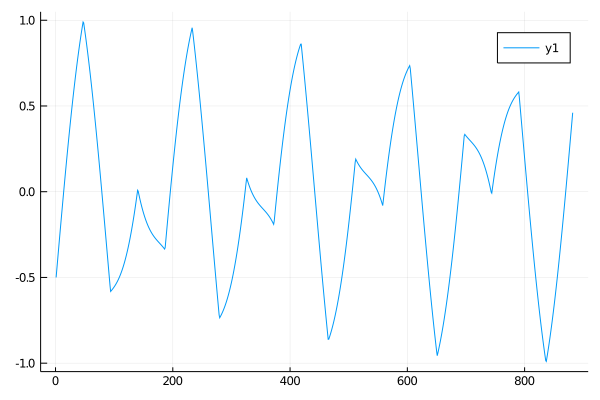

In [7]:
using Plots
plot(rec[(1:882) .+ 00000])